# Lecture 7

**Authors:**
* Yilber Fabian Bautista 
* 

**Last date of modification:**
 December 26th 2021

Hello there,

welcome to Lecture 7 of this mini-lecture series on programing with Python. In this series, you will learn basic and intermediate python tools that will be of great use in your scientific carer.

By the end of this lecture you will be able to:
* Perform  1 dimensional **interpolating** functions using **interp1d** and **InterpolatedUnivariateSpline** in the **scipy** library
* Differentiate  between **polynomial** and **Spline** interpolation
* Use the different interpolation **kinds** available for the **interp1d** method
* Change the **polynomial degree** of an **InterpolatedUnivariateSpline** function. 
* Use the numeric **differentiation** and **integration** methods available from **InterpolatedUnivariateSpline** 
* Perform 2 dimensional **interpolations** using  **BivariateSpline** function in  the **scipy** library

# Interpolations

In Lectures 3, 5 and 6 we have used **interpolations** to access information in a given set of data, where no data is available. In this tutorial we will expand on  **interpolations**. We will cover **1-Dimensional**
 and **2-Dimensional** interpolations. 
 
##  1-Dimensional Interpolations

Given a set of data points $(x_i,f_i)$, with $x_{min} \le x_i\le x_{max}$, an **interpolation function** $ f(x)$ is a curve that passes through all of the data points available in the data set. Once such a curve is found,  it can be evaluated  at different locations $f(x')$, with $x_{min} \le x'\le x_{max}$,  i.e. it can only be evaluated in the interval $[x_{min}, x_{max}]$. 

In this tutorial we will cover two functions inside the `scipy` library to do **1-Dimensional interpolations**. The `interp1d` and the `InterpolatedUnivariateSpline` functions. 


## `interp1d` 

We have already used this function in previous tutorials. See  [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html) for  accessing the documentation.  The basics syntax is the following

```py
x = ...
y = ...
interp1d(x, y)
```
Let us see an explicit example


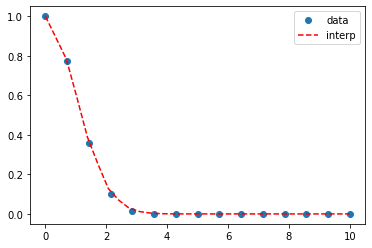

In [1]:
import numpy as np # For maths
from scipy.interpolate import interp1d # For 1-D interpolations
import matplotlib.pyplot as plt # For ploting

x = np.linspace(0,10,15)
y = np.exp(-x**2/2)

f = interp1d(x,y)

xp = np.linspace(0,10,30)
fp = f(xp)

plt.plot(x,y,'o',label = "data")
plt.plot(xp,fp,'r--',label = "interp")
plt.legend(loc = "upper right")
plt.show()

`interp1d` has different ways (`kind`) of doing the **interpolation**, the default type is `type = linear`, where polynomials of degree 1 are used to approximate the curve in the regions where no data is available.  Run the command 

```py
interp1d?
```
to see the different `kind` available to use. In previous tutorials we have used `kind = quadratic ` to do the **interpolations**. This uses polynomials of second degree to approximate the curve. 

# Exercise 1

Run the following `lines` to do a comparison of the different interpolations `kind ` available in the `interp1d` method. 

```py
from scipy.interpolate import interp1d # For 1-D interpolations
import matplotlib.pyplot as plt # For ploting

#%matplotlib notebook #uncomment this line for plot manipulation in jupyter notebook
x = np.linspace(0,10,11)
y = np.sin(x) 
xp = np.linspace(0,10,100) #New data to evaluate after the  interpolation is done

plt.plot(x,y,"o",label = "data")

# Do the interpolation for all the different kinds 
kind = ['linear', 'nearest', 'zero', 'slinear', 'quadratic', 'cubic']


for k in kind:
    f = interp1d(x,y,kind = k)
    yp = f(xp)
    plt.plot(xp,yp,label = k)
plt.legend(loc = 'lower right')  
#plt.show()

```


What can you conclude from the different ways of doing the interpolations?





In [3]:
# Try it yourself

## `InterpolatedUnivariateSpline`
A **spline interpolation** is a way of interpolating a set of data, where  the interpolant is a   piecewise polynomial called a spline. 
The advantage of**spline interpolation** over **polynomial interpolation** is that the former fits low-degree polynomials to small subsets of the values. For example, one can fit say   nine cubic polynomials between each of the pairs of ten points, instead of fitting a single degree-ten polynomial to all of them.  

![](./Figures/spline.png)
Figure taken from [here](https://en.wikipedia.org/wiki/Spline_(mathematics)). The vertexes of the **spline** are called **knots**. 

`InterpolatedUnivariateSpline` Fits a spline y = spl(x) of degree $k$ with $k\le5$, to the provided x, y data. The Spline function passes through all provided points. Here $k$ is the polynomial degree to approximate the curve.

The syntax for interpolating a set of points using `InterpolatedUnivariateSpline` is very similar to the one for `interp1d`

```py
x = ...
y = ...
spl = InterpolatedUnivariateSpline(x, y, k = ..)
```
 
The default value for the polynomial degree is $k=3$. See the [InterpolatedUnivariateSpline documentation](https://docs.scipy.org/doc/scipy/reference/reference/generated/scipy.interpolate.InterpolatedUnivariateSpline.html)

Let us provide  an specific example

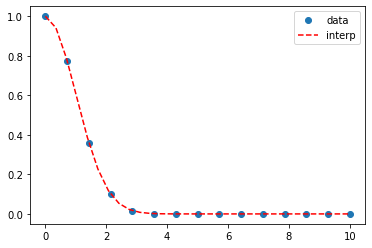

In [4]:
from scipy.interpolate import InterpolatedUnivariateSpline

x = np.linspace(0,10,15)
y = np.exp(-x**2/2)

spl = InterpolatedUnivariateSpline(x,y)

xp = np.linspace(0,10,30)
splp = spl(xp)

plt.plot(x,y,'o',label = "data")
plt.plot(xp,splp,'r--',label = "interp")
plt.legend(loc = "upper right")
plt.show()

# Exercise 2

Compare the result from the `InterpolatedUnivariateSpline` from the previous example  with the corresponding `interp1d` result for  interpolation kind to be `kind ='cubic'`, by computing the error 
$$
Error = ||f(yp)- f_{\text{true}}(yp)||
$$
where $f_{\text{true}}(yp)$ is the true value of the function (recall the true function is $e^{-x^2/2}$). Hint: Use `linalg` function from `numpy` library to compute the norm of the vector $f(yp)- f_{\text{true}}(yp)$. 

What do you conclude?


# Solution 

In [5]:
from numpy import linalg


x = np.linspace(0,10,15)
y = np.exp(-x**2/2)

f = interp1d(x,y,kind ='cubic')

xp = np.linspace(0,10,30)
fp = f(xp)


true_val = np.exp(-xp**2/2)

#errors
error_spl = (splp - true_val)
error_intp1d = (fp - true_val)

#norms
print(linalg.norm(error_spl))
print(linalg.norm(error_intp1d))

0.0022646938322236475
0.002264693832223631


### Why using InterpolatedUnivariateSpline?

Unlike `interp1d`, **interpolating** functions created from `InterpolatedUnivariateSpline` have additional methods that can be applied to the resulting functions. Among these methods we have numeric **differentiation** and **integration**.

Let us for instance compute the first antiderivative of our Spline for the previous example


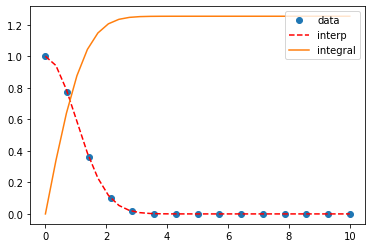

In [20]:
integral_spl = spl.antiderivative(1)

int_splp = integral_spl(xp)

plt.plot(x,y,'o',label = "data")
plt.plot(xp,splp,'r--',label = "interp")
plt.plot(xp,int_splp,label = "integral")

plt.legend(loc = "upper right")
plt.show()

# Exercise 3

- Do the analog plot for the first and second **derivatives** of the spline of our example. Hint: The derivative method has the analog syntax `.derivative(n)`.

- Explore the additional methods applied to the interpolating function resulting from using `InterpolatedUnivariateSpline`, mentioned in the  [documentation](https://docs.scipy.org/doc/scipy/reference/reference/generated/scipy.interpolate.InterpolatedUnivariateSpline.html)

## 2-Dimensional interpolations

We will use [BivariateSpline](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.BivariateSpline.html#scipy-interpolate-bivariatespline)